## Load and apply a trained Keras model

This example is from [Stefan Wunsch (CERN IML TensoFlow and Keras workshop)](https://github.com/stwunsch/iml_tensorflow_keras_workshop).

The code of this notebook shows how you can load and apply an already trained Keras model.

In [21]:
from os import environ
environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import png
from tensorflow.keras.models import load_model
from os import listdir
import matplotlib.pyplot as plt

## Load the model

Loading a Keras model needs only a single line of code, see below. After this call, the model is back in the same state you stored it at the training step either by the `ModelCheckpoint` or `model.save(...)`.

In [22]:
model = load_model("mnist_keras_model.h5")

## Apply the model

The application is done as shown in the testing phase of the training script. Simply call `model.predict(inputs)` on your data.

In [23]:
predictions = []
images = []
for f in sorted(listdir(".")):
    if "mnist_example_" in f:
        image = np.zeros((1, 28, 28, 1), dtype=np.uint8)
        pngdata = png.Reader(open(f, 'rb')).asDirect()
        for i_row, row in enumerate(pngdata[2]):
            image[0, i_row, :, 0] = row 
        images.append(image)
        
        prediction = np.argmax(model.predict(image))
        predictions.append(prediction)

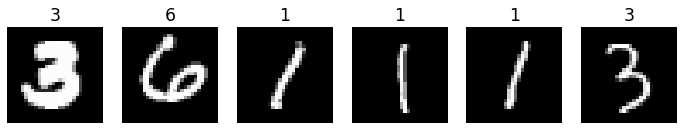

In [24]:
num_examples = len(images)
plt.figure(figsize=(num_examples*2, 2))
plt.rcParams.update({'axes.titlesize': 'xx-large'})
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.axis('off')
    plt.imshow(np.squeeze(images[i]), cmap="gray")
    plt.title("{}".format(predictions[i]))

Model prediction for each class: [[7.07729375e-10 2.41280247e-07 9.20447963e-13 9.99745309e-01
  9.36551413e-16 8.85201956e-08 1.19381256e-14 1.21066512e-09
  8.08947492e-11 2.54379585e-04]]
Predicted digit: 3


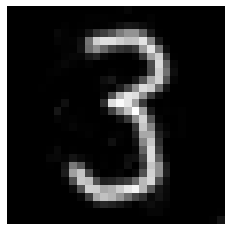

In [25]:
f = "mnist_my_digit_3.png"
image = np.zeros((1, 28, 28, 1), dtype=np.uint8)
pngdata = png.Reader(open(f, 'rb')).asDirect()
for i_row, row in enumerate(pngdata[2]):
    image[0, i_row, :, 0] = row
    
prediction_vector = model.predict(image)
prediction = np.argmax(prediction_vector)
print (f"Model prediction for each class: {prediction_vector}")
print (f"Predicted digit: {prediction}")
plt.axis('off')
plt.imshow(np.squeeze(image), cmap="gray");